# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [4]:
# DEBUG 1500 - Recommended by tutor to speed up process
NUM_POINTS = 500


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 291


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
base_url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"


In [128]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&q={city}"
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=ulaanbaatar
Processing Record 1 of Set 1 | ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=saint-philippe
Processing Record 2 of Set 1 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=dikson
Processing Record 3 of Set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=hobart
Processing Record 4 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=albany
Processing Record 5 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=atuona
Processing Record 6 of Set 1 | atuona
http://api.openweathermap.org/data/2.5

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=tuktoyaktuk
Processing Record 3 of Set 2 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=touros
Processing Record 4 of Set 2 | touros
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=kastamonu
Processing Record 5 of Set 2 | kastamonu
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=oussouye
Processing Record 6 of Set 2 | oussouye
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=belushya guba
Processing Record 7 of Set 2 | belushya guba
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=sitka
Processing Record 8 of Set 2 | sitka
http://api.openweathermap.org/data/2.5/weather?units=metric&appi

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=komsomolskiy
Processing Record 7 of Set 3 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=provideniya
Processing Record 8 of Set 3 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=ahome
Processing Record 9 of Set 3 | ahome
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=amderma
Processing Record 10 of Set 3 | amderma
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=krasnouralsk
Processing Record 11 of Set 3 | krasnouralsk
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=sarankhola
Processing Record 12 of Set 3 | sarankhola
http://api.openweathermap.org/data/2.5/weather?unit

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=tarko-sale
Processing Record 11 of Set 4 | tarko-sale
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=ribeira grande
Processing Record 12 of Set 4 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=conde
Processing Record 13 of Set 4 | conde
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=kolochava
Processing Record 14 of Set 4 | kolochava
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=bethel
Processing Record 15 of Set 4 | bethel
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=howard springs
Processing Record 16 of Set 4 | howard springs
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d157

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=flinders
Processing Record 15 of Set 5 | flinders
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=rawson
Processing Record 16 of Set 5 | rawson
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=bambous virieux
Processing Record 17 of Set 5 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=iqaluit
Processing Record 18 of Set 5 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=alice springs
Processing Record 19 of Set 5 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=roald
Processing Record 20 of Set 5 | roald
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=gizo
Processing Record 19 of Set 6 | gizo
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=cienfuegos
Processing Record 20 of Set 6 | cienfuegos
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=paducah
Processing Record 21 of Set 6 | paducah
http://api.openweathermap.org/data/2.5/weather?units=metric&appid=c778d1577d05aa5b52e7cbb6f956156e&q=baiao
Processing Record 22 of Set 6 | baiao
-----------------------------
Data Retrieval Complete      
-----------------------------


In [129]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          254
Lat           254
Lng           254
Max Temp      254
Humidity      254
Cloudiness    254
Wind Speed    254
Country       254
Date          254
dtype: int64

In [130]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ulaanbaatar,47.9077,106.8832,-17.93,65,24,1.00,MN,1675571336
1,saint-philippe,-21.3585,55.7679,27.84,82,96,4.12,RE,1675571342
2,dikson,73.5069,80.5464,-21.10,99,100,1.59,RU,1675571344
3,hobart,-42.8794,147.3294,23.48,54,20,6.17,AU,1675571114
4,albany,42.6001,-73.9662,-7.65,55,52,2.57,US,1675571079


In [131]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [132]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulaanbaatar,47.9077,106.8832,-17.93,65,24,1.00,MN,1675571336
1,saint-philippe,-21.3585,55.7679,27.84,82,96,4.12,RE,1675571342
2,dikson,73.5069,80.5464,-21.10,99,100,1.59,RU,1675571344
3,hobart,-42.8794,147.3294,23.48,54,20,6.17,AU,1675571114
4,albany,42.6001,-73.9662,-7.65,55,52,2.57,US,1675571079


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

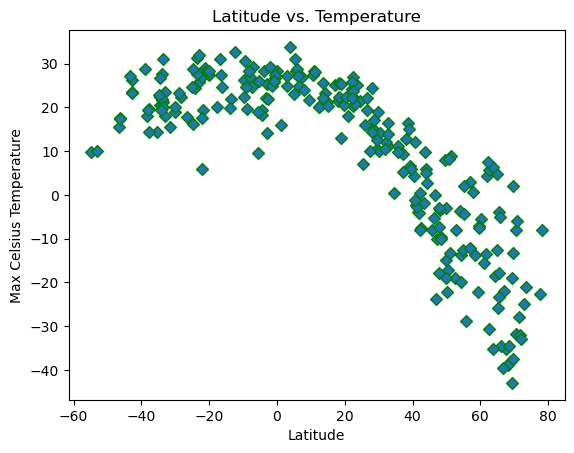

In [133]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    marker="D",
    edgecolor="green",
    
)

# Incorporate the other graph properties
plt.title(f"Latitude vs. Temperature")
plt.ylabel("Max Celsius Temperature")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [134]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black"
    marker=
)

# Incorporate the other graph properties
plt.title(f"Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

SyntaxError: invalid syntax (4069772874.py, line 6)

#### Latitude Vs. Cloudiness

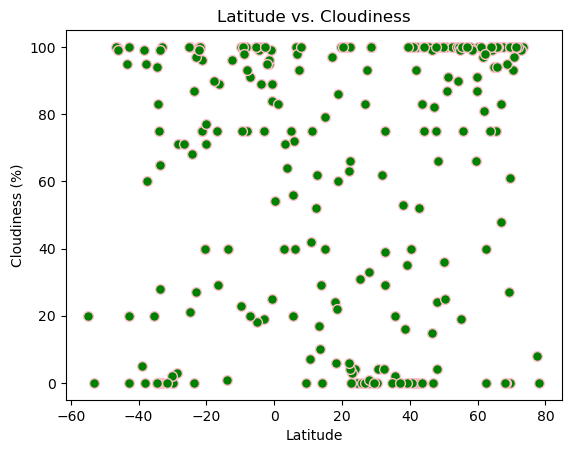

In [148]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="pink",
    marker= "o",
    c="green",
    s=50
)

# Incorporate the other graph properties
plt.title(f"Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

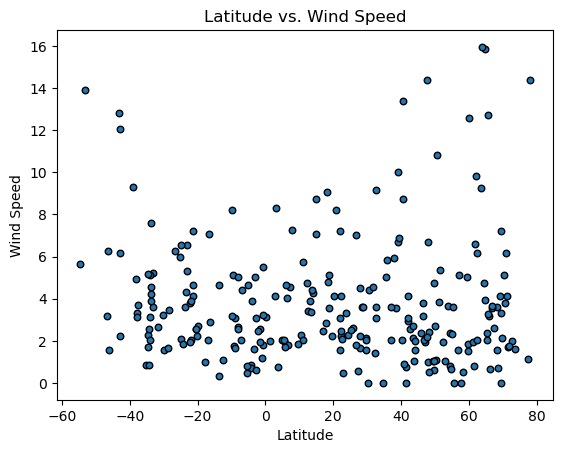

In [152]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    marker= "o",
    s=22
)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [137]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value,y_value,title,text_coord):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()
        
        

In [138]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulaanbaatar,47.9077,106.8832,-17.93,65,24,1.00,MN,1675571336
2,dikson,73.5069,80.5464,-21.10,99,100,1.59,RU,1675571344
4,albany,42.6001,-73.9662,-7.65,55,52,2.57,US,1675571079
6,melfort,52.8667,-104.6177,-7.93,79,100,1.03,CA,1675571347
7,dingle,10.9995,122.6711,28.42,71,42,5.76,PH,1675571350


In [139]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saint-philippe,-21.3585,55.7679,27.84,82,96,4.12,RE,1675571342
3,hobart,-42.8794,147.3294,23.48,54,20,6.17,AU,1675571114
5,atuona,-9.8000,-139.0333,26.33,73,23,8.22,PF,1675571346
9,codrington,-38.2667,141.9667,18.02,59,99,4.93,AU,1675571355
10,vaini,-21.2000,-175.2000,29.09,89,75,4.63,TO,1675571356


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7646891168506302


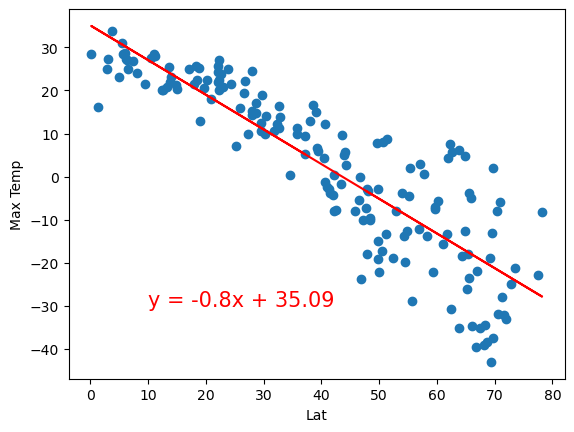

In [142]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(10,-30))

The r-value is 0.11763703410840592


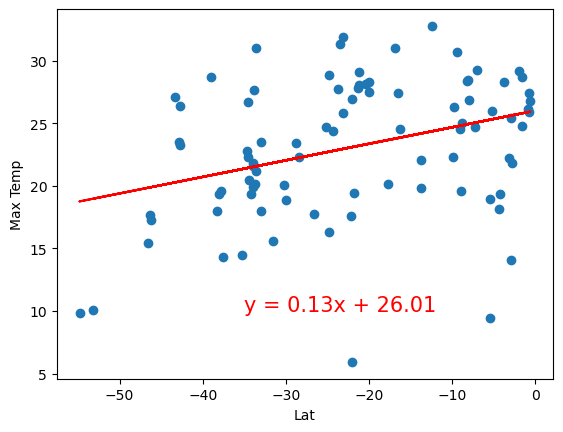

In [143]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-35, 10))

**Discussion about the linear relationship: The sample correlation between latitude and max temp is strong in the northern latitude but very weak in the southern latitude cities.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.1939049678358


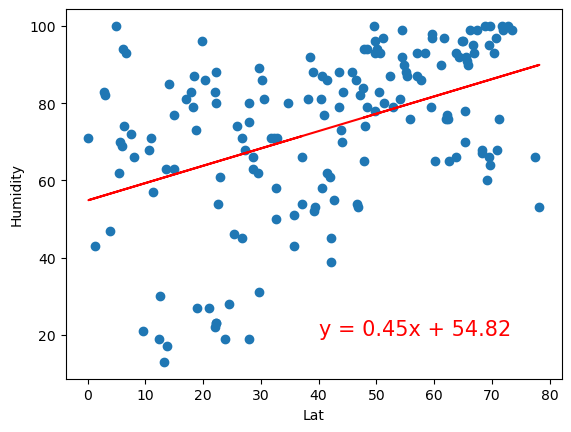

In [154]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,20))

The r-value is 0.09225164967782783


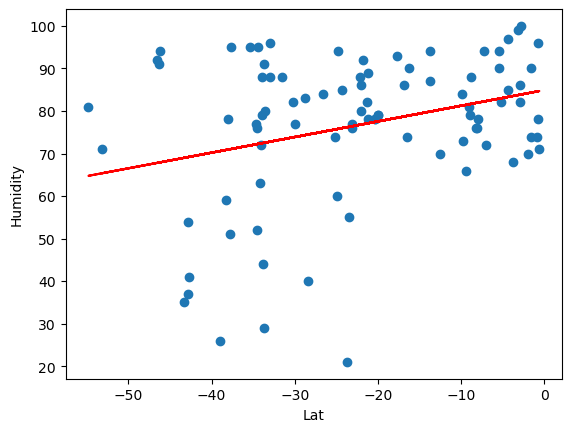

In [155]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,20))

**Discussion about the linear relationship:Correlation between latitude and humidity is very weak in both north and south, with least correlation in the south. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.08444048816558279


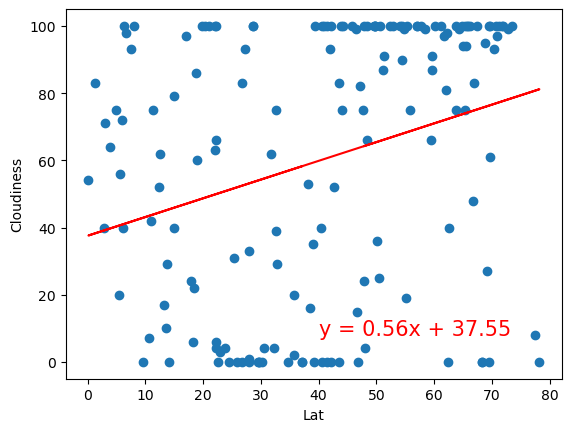

In [159]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(40,8))

The r-value is 0.11674917522623822


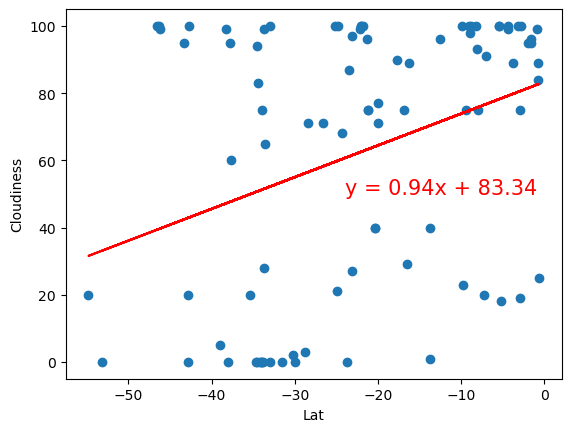

In [161]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-24,50))

**Discussion about the linear relationship: Cloudiness and latitude correlation is very weak. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.003299045084134012


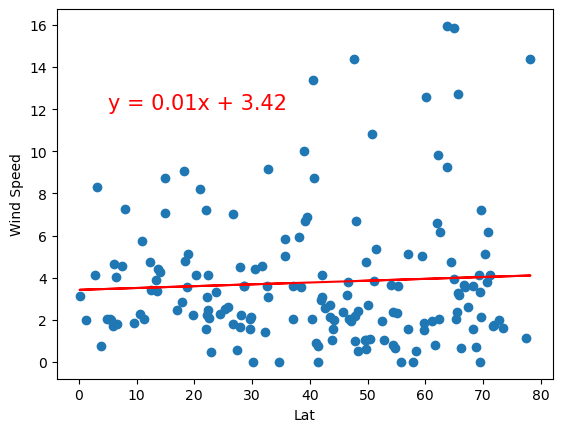

In [163]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(5,12))

The r-value is 0.15859831740682911


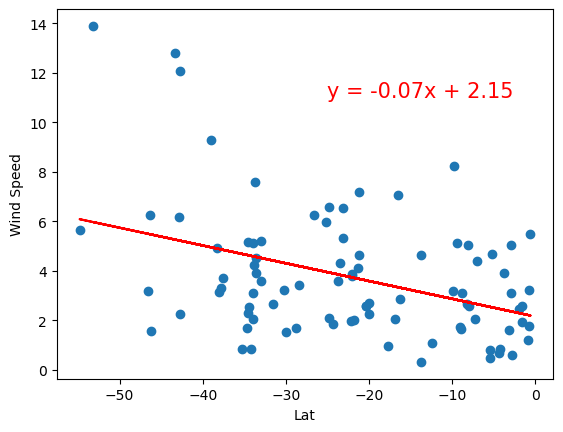

In [165]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-25,11))

**Discussion about the linear relationship: Very weak correlation between wind speed in the southern hemisphere and basically no correlation in the north. 